# Problem Set 
## Forecasting/Predictive Analysis 
### Hyndman Book Chapter 5.10


--------------------------------

#### **Name: Sherry Peng Tian** 

#### **Date: Oct. 22, 2019** 





### Exercise 1 

In [1]:
# Set up and install packages 

library(ggplot2)
library(fpp2)

Loading required package: forecast
Warning message:
“package ‘forecast’ was built under R version 3.5.2”Loading required package: fma
Loading required package: expsmooth


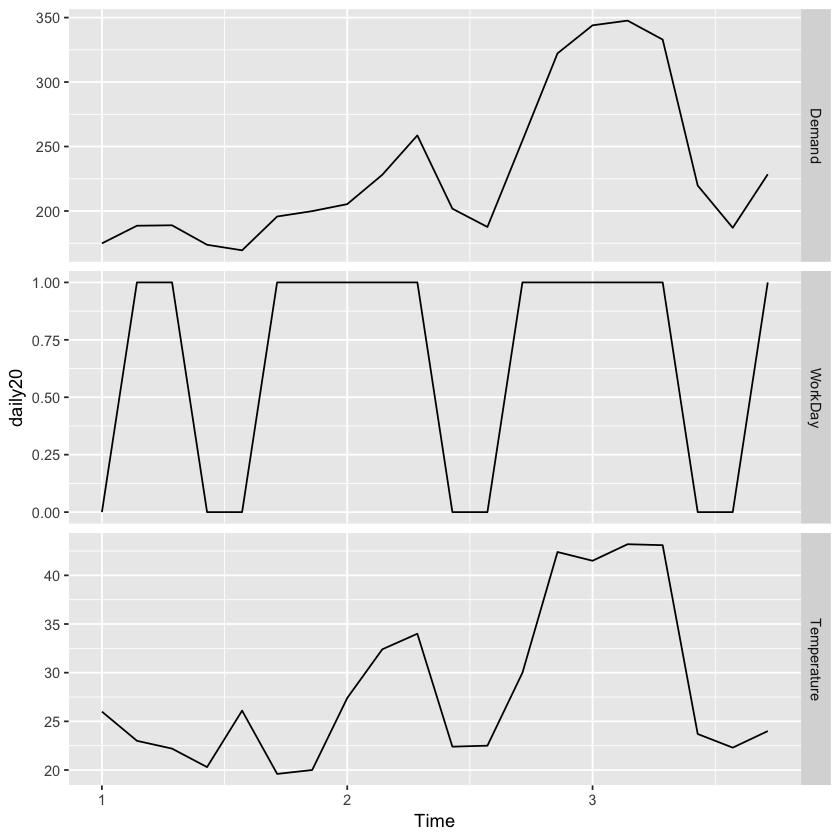

In [3]:
daily20 <- head(elecdaily, 20)
autoplot(daily20, facets = TRUE)

- Why is there a positive relationship? 

There is a positive relationship between Temperature and Demand, because when the temperature raises among the time, people need to use the Airconditioning more often, resulting in a larger use of electricity. 

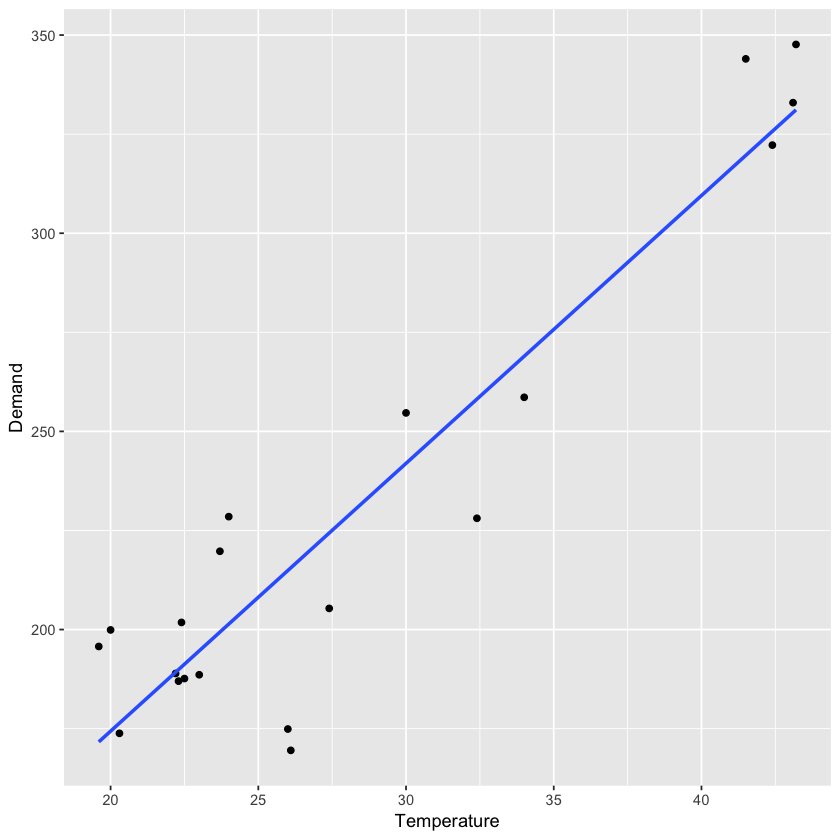

In [4]:
daily20 %>%
  as.data.frame() %>%
  ggplot(aes(x=Temperature, y=Demand)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE)


	Breusch-Godfrey test for serial correlation of order up to 5

data:  Residuals from Linear regression model
LM test = 3.8079, df = 5, p-value = 0.5774



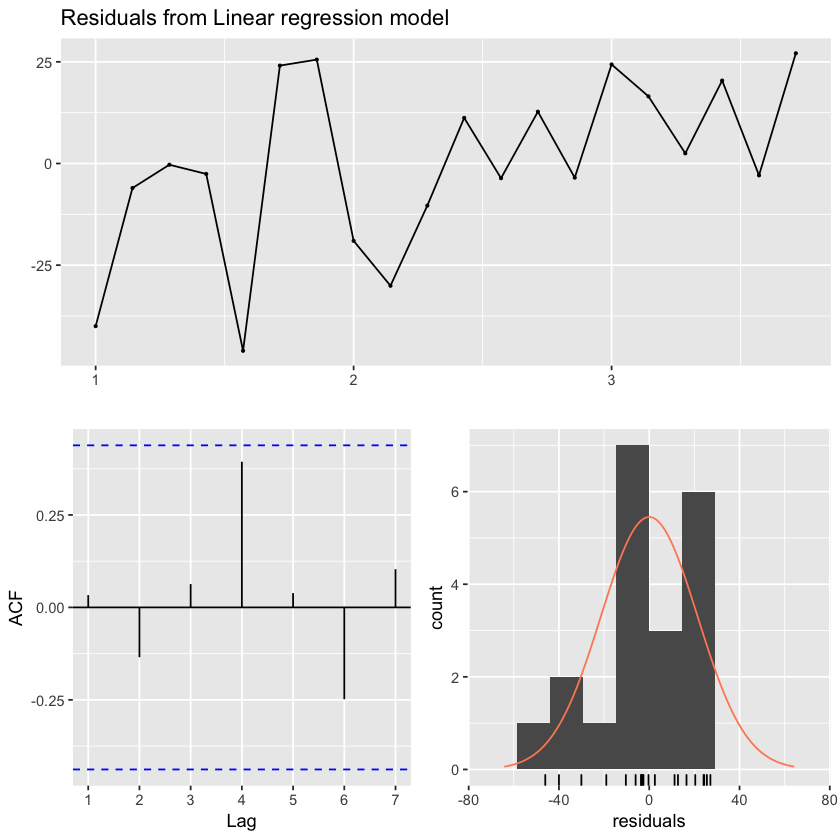

In [5]:
fit <- tslm(Demand ~ Temperature, data=daily20)
checkresiduals(fit)

- Is the model adequate? Are there any outliers or influential observations? 

The model is not quite adequate, from my perspective because the distribution of OLS regression residuals is not normal or splattered around 0 even though there is no clear clue of autocorrelation from the ACF chart. 

In [8]:
forecast(fit, newdata=data.frame(Temperature=c(15,35)))

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
3.857143       140.5701 108.6810 172.4591  90.21166 190.9285
4.000000       275.7146 245.2278 306.2014 227.57056 323.8586